In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
import urllib
import csv

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [13]:
X_train = np.loadtxt(open("train/out_bag_of_words_5.csv", "rb"), delimiter=",", skiprows=0)
y_train = np.loadtxt(open("train/out_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test  = np.loadtxt(open("test/out_bag_of_words_0.csv", "rb"), delimiter=",", skiprows=0)
y_test  = np.loadtxt(open("test/out_classes_0.txt", "rb"), delimiter=",", skiprows=0)

In [14]:
# confusion matrices
# code initially taken from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

class_names = ['positive (1)', 'negative (0)'];

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
def make_confusion_matrix(y_test, y_pred):

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

#     # Plot non-normalized confusion matrix
#     plt.figure()
#     plot_confusion_matrix(cnf_matrix, classes=class_names,
#                           title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

0.503333333333
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.97  0.03]]


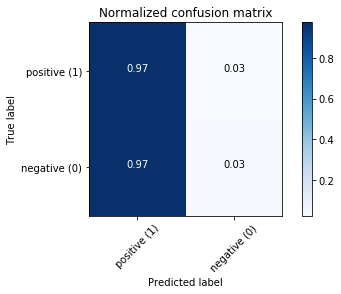

In [16]:
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train, y_train)
#print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))
make_confusion_matrix(y_test, y_pred)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.77
Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.25  0.75]]


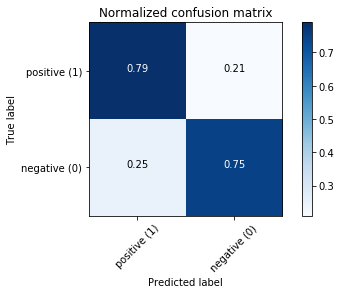

In [17]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

y_expect = y_test
y_pred = MultiNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))
make_confusion_matrix(y_test, y_pred)

GaussianNB(priors=None)
0.705
Normalized confusion matrix
[[ 0.56  0.44]
 [ 0.15  0.85]]


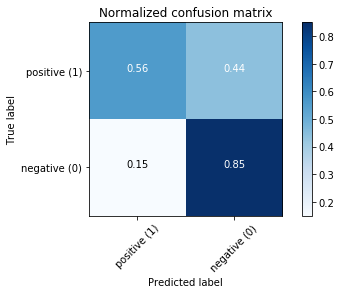

In [18]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

y_expect = y_test
y_pred = GausNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))
make_confusion_matrix(y_test, y_pred)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
0.773333333333
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.25  0.75]]


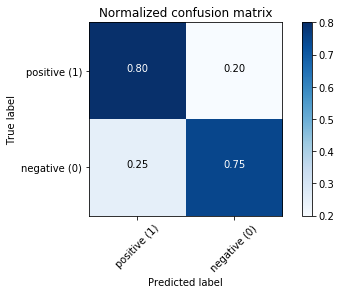

In [19]:
BernNB = BernoulliNB(binarize = 0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))
make_confusion_matrix(y_test, y_pred)